In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Word2Vec

In [2]:
c = np.array([1,0,0,0,0,0,0])
w = np.random.randn(7,3)
h = np.matmul(c,w)
h.shape

(3,)

In [4]:
c0 = np.array([1,0,0,0,0,0,0])
c1 = np.array([0,0,1,0,0,0,0])

Win = np.random.randn(7,3)
Wout = np.random.randn(3,7)

h1 = np.matmul(c0, Win)
h2 = np.matmul(c1, Win)
h = 0.5 * (h1+h2)
out = np.matmul(h, Wout)
out.shape

(7,)

In [5]:
text = 'You say goodbye and I say hello.'

In [6]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    word = text.split()
    
    word2id={}
    id2word={}
    
    for i in word:
        if i not in word2id:
            word2id[i] = len(word2id)
            id2word[len(word2id)] = i 
            
    corpus = [word2id[i] for i in word]
    
    return corpus, word2id, id2word

In [7]:
corpus, word2id, id2word = preprocess(text)

In [25]:
def create_contexts_target(corpus, window_size=1):
    contexts=[]
    target=[]
    
    for i in range(len(corpus)):
        if (i == 0) or (i==int(len(corpus)-1)):
            continue
        else:
            target.append(corpus[i])
            contexts.append([corpus[i- window_size], corpus[i + window_size]])
    
    return np.array(contexts), np.array(target)

In [26]:
contexts, target = create_contexts_target(corpus)

In [27]:
contexts

array([[0, 2],
       [1, 3],
       [2, 4],
       [3, 1],
       [4, 5],
       [1, 6]])

In [38]:
target

array([1, 2, 3, 4, 1, 5])

In [41]:
def convert_one_hot(corpus, vocab_size):
    
    if corpus.ndim == 1:
        one_hot = np.zeros((len(corpus), vocab_size), dtype=np.int32)
        for i, k in enumerate(corpus):
            one_hot[i,k] += 1
            
    elif corpus.ndim == 2:
        one_hot = np.zeros((corpus.shape[0], corpus.shape[1], vocab_size), dtype=np.int32)
        for i, k in enumerate(corpus):
            for j,t in enumerate(k):
                one_hot[i,j,t] += 1 
                
    return one_hot

In [42]:
contexts_oh = convert_one_hot(contexts, len(word2id))
target_oh = convert_one_hot(target, len(word2id))

In [46]:
contexts_oh.shape, target_oh.shape

((6, 2, 7), (6, 7))

## CBOW

In [49]:
from common.layers import MatMul, SoftmaxWithLoss

In [57]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        v, h = vocab_size, hidden_size
        
        w_in = 0.01* np.random.randn(vocab_size, hidden_size).astype(np.float32)
        w_out = 0.01 * np.random.randn(hidden_size, vocab_size).astype(np.float32)
        
        self.in_layer0 = MatMul(w_in)
        self.in_layer1 = MatMul(w_in)
        self.out_layer = MatMul(w_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads=[],[]
        
        for layer in layers:
            self.params += layer.params
            self.grads  += layer.grads
            
        self.word_vecs = w_in
        
    
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:,0])
        h1 = self.in_layer1.forward(contexts[:,1])
        h = 0.5 * (h0+h1)
        
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target) 
        return loss
    
    def backward(self ,dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        
        return None
                                             

In [58]:
from common.trainer import Trainer
from common.optimizer import Adam

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 260 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 261 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 262 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 263 |  반복 1 / 2 | 시간 0[s] | 손실 1.21
| 에폭 264 |  반복 1 / 2 | 시간 0[s] | 손실 1.03
| 에폭 265 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 266 |  반복 1 / 2 | 시간 0[s] | 손실 1.03
| 에폭 267 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 268 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 269 |  반복 1 / 2 | 시간 0[s] | 손실 1.01
| 에폭 270 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 271 |  반복 1 / 2 | 시간 0[s] | 손실 1.19
| 에폭 272 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 273 |  반복 1 / 2 | 시간 0[s] | 손실 0.97
| 에폭 274 |  반복 1 / 2 | 시간 0[s] | 손실 1.03
| 에폭 275 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 276 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 277 |  반복 1 / 2 | 시간 0[s] | 손실 1.10
| 에폭 278 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 279 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 280 |  반복 1 / 2 | 시간 0[s] | 손실 1.03
| 에폭 281 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 282 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 283 |  반복 1 / 2 | 시간 0[s] | 손실 1.05
| 에폭 284 |  반복 1

| 에폭 577 |  반복 1 / 2 | 시간 0[s] | 손실 0.43
| 에폭 578 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 579 |  반복 1 / 2 | 시간 0[s] | 손실 0.40
| 에폭 580 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 581 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 582 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 583 |  반복 1 / 2 | 시간 0[s] | 손실 0.30
| 에폭 584 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 585 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 586 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 587 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 588 |  반복 1 / 2 | 시간 0[s] | 손실 0.39
| 에폭 589 |  반복 1 / 2 | 시간 0[s] | 손실 0.40
| 에폭 590 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 591 |  반복 1 / 2 | 시간 0[s] | 손실 0.40
| 에폭 592 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 593 |  반복 1 / 2 | 시간 0[s] | 손실 0.34
| 에폭 594 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 595 |  반복 1 / 2 | 시간 0[s] | 손실 0.33
| 에폭 596 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 597 |  반복 1 / 2 | 시간 0[s] | 손실 0.38
| 에폭 598 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 599 |  반복 1 / 2 | 시간 0[s] | 손실 0.39
| 에폭 600 |  반복 1 / 2 | 시간 0[s] | 손실 0.42
| 에폭 601 |  반복 1

| 에폭 899 |  반복 1 / 2 | 시간 0[s] | 손실 0.32
| 에폭 900 |  반복 1 / 2 | 시간 0[s] | 손실 0.42
| 에폭 901 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 902 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 903 |  반복 1 / 2 | 시간 0[s] | 손실 0.41
| 에폭 904 |  반복 1 / 2 | 시간 0[s] | 손실 0.11
| 에폭 905 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 906 |  반복 1 / 2 | 시간 0[s] | 손실 0.12
| 에폭 907 |  반복 1 / 2 | 시간 0[s] | 손실 0.42
| 에폭 908 |  반복 1 / 2 | 시간 0[s] | 손실 0.32
| 에폭 909 |  반복 1 / 2 | 시간 0[s] | 손실 0.34
| 에폭 910 |  반복 1 / 2 | 시간 0[s] | 손실 0.32
| 에폭 911 |  반복 1 / 2 | 시간 0[s] | 손실 0.41
| 에폭 912 |  반복 1 / 2 | 시간 0[s] | 손실 0.23
| 에폭 913 |  반복 1 / 2 | 시간 0[s] | 손실 0.31
| 에폭 914 |  반복 1 / 2 | 시간 0[s] | 손실 0.45
| 에폭 915 |  반복 1 / 2 | 시간 0[s] | 손실 0.20
| 에폭 916 |  반복 1 / 2 | 시간 0[s] | 손실 0.34
| 에폭 917 |  반복 1 / 2 | 시간 0[s] | 손실 0.32
| 에폭 918 |  반복 1 / 2 | 시간 0[s] | 손실 0.41
| 에폭 919 |  반복 1 / 2 | 시간 0[s] | 손실 0.24
| 에폭 920 |  반복 1 / 2 | 시간 0[s] | 손실 0.22
| 에폭 921 |  반복 1 / 2 | 시간 0[s] | 손실 0.52
| 에폭 922 |  반복 1 / 2 | 시간 0[s] | 손실 0.12
| 에폭 923 |  반복 1

C:\Users\park1\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park1\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park1\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park1\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park1\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\park1\AppData\Roaming\Python

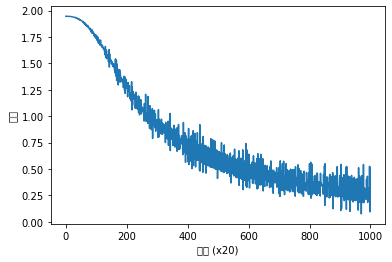

In [60]:
window_size=1
hidden_size=5
batch_size=3
epoch=1000

text = 'You say goodbye and I say Hello.'
corpus ,word2id, id2word = preprocess(text)

vocab_size = len(word2id)
contexts, target = create_contexts_target(corpus, window_size)
contexts = convert_one_hot(contexts,vocab_size)
target = convert_one_hot(target,vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer=Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, epoch ,batch_size)
trainer.plot()


In [70]:
word_vec = model.word_vecs

for Id, word in id2word.items():
    print(word, word_vec[Id-1])

you [ 1.6901283  0.825627  -1.0156299 -0.8249811 -1.2615722]
say [-0.43258476 -1.3089011   0.37358826  1.2954787  -1.2135836 ]
goodbye [-0.5958866  1.1629804 -0.9005643 -1.197545  -0.5162944]
and [-1.4328246 -1.2040296 -1.6805801  1.1903626 -0.6320474]
i [-0.5911014  1.1533724 -0.9017848 -1.1873158 -0.5325603]
hello [ 1.6791414  0.8085469 -1.0259537 -0.8317045 -1.2788073]
. [ 1.4576437 -1.0191629  1.348799   1.0288314 -1.2829742]
